In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
heart_disease = pd.read_csv("heart-disease.csv")

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
np.random.seed(42)
x =  heart_disease.drop('target' , axis = 1)
y = heart_disease['target']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

model = LinearSVC(max_iter=10000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [3]:
import pandas as pd
import numpy as np 
heart_disease = pd.read_csv("heart-disease.csv")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x =  heart_disease.drop('target' , axis = 1)
y = heart_disease['target']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.8524590163934426

Same values generated. Below are the methods of checking accuracy of our model.

In [4]:
y_preds = model1.predict(x_test)
np.mean(y_preds == y_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_preds)

#Comparing the predictions to the truth and calculating the error 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

0.14754098360655737

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score =   cross_val_score(model1,x,y,cv =10)
np.mean(cross_val_score)



0.8180645161290322

In [6]:
print(f"Heart Disease classifier Cross Validated Accuracy : {np.mean(cross_val_score)*100 : .2f}%")

Heart Disease classifier Cross Validated Accuracy :  81.81%


# Area Under ROC Curve : ROC Curves are a comparision of a models true positive rate vs. false positive rate 

TP = when model predicts 1 when truth is 1
FP = when model predicts 1 when truth is 0
TN = when model predicts 0 when truth is 0
FN = when model predicts 0 when truth is 1

# ROC Curve is based upon predcited probabilities

In [7]:
from sklearn.metrics import roc_curve
y_probs = model1.predict_proba(x_test)[:]
y_probs_positive = y_probs[:,1]
fpr , tpr , threshold = roc_curve(y_test,y_probs_positive) 



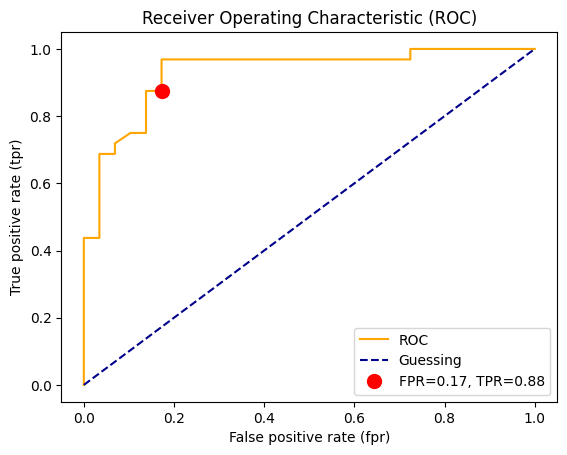

Closest point to FPR=0.2: (FPR=0.1724, TPR=0.8750)


In [11]:
# PLOTTING THE CURVE

def plot_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label="ROC")
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle="--", label="Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC)")
    
    # Find point closest to FPR = 0.2
    target_fpr = 0.2
    closest_idx = np.argmin(np.abs(fpr - target_fpr))
    closest_fpr = fpr[closest_idx]
    closest_tpr = tpr[closest_idx]
    
    plt.plot(closest_fpr, closest_tpr, 'ro', markersize=10, 
             label=f'FPR={closest_fpr:.2f}, TPR={closest_tpr:.2f}')
    
    plt.legend()
    plt.show()
    
    print(f"Closest point to FPR=0.2: (FPR={closest_fpr:.4f}, TPR={closest_tpr:.4f})")

# Call the function with your data
plot_curve(fpr, tpr)

